# 1. The most Nobel of Prizes
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:120px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<h3>The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016.</h3>

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import DataFrame

nobel = pd.read_csv('datasets/nobel.csv')

# Taking a look at the first 6 winners
nobel.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


# 2. So, who gets the Nobel Prize?
<p>We see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [2]:
# Display the number of Nobel Prizes handed out between 1901 and 2016
display(len(nobel))

# Display the number of prizes won by male and female recipients.
display(nobel['sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
nobel['birth_country'].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

# 3. USA dominance
<p>Earlier all Nobel Prize winners were European. So, when did the USA start to dominate the Nobel Prize charts? </p>

In [3]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == "United States of America"
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype('int')
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


# 4. USA dominance, visualized
<p>When the USA started to dominate the Nobel charts we can see from this plot!</p>

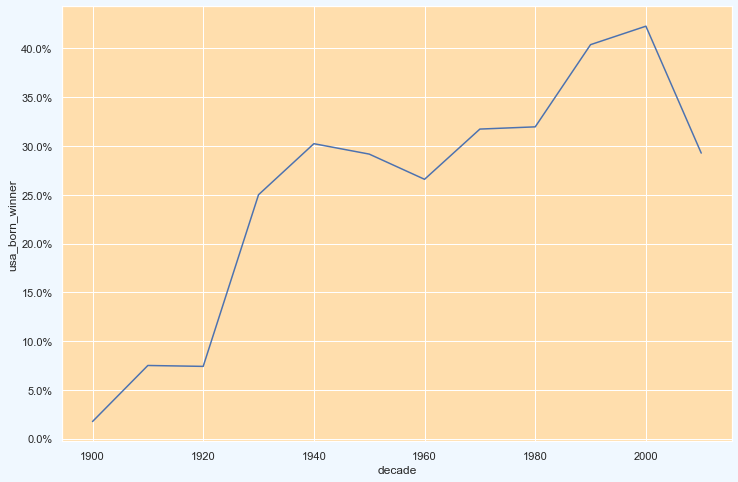

In [4]:
# Setting the plotting theme
sns.set(rc={'axes.facecolor':'navajowhite', 'figure.facecolor':'aliceblue'})
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

# Plotting USA born winners 
ax = sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# 5. Performance of India
<p>As we can see, performance of India is not as consistent as compared to that of USA.</p>

In [5]:
# Calculating the proportion of India born winners per decade
nobel['indian_born_winner'] = nobel['birth_country'] == "India"
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype('int')
prop_indian_winners = nobel.groupby('decade', as_index=False)['indian_born_winner'].mean()

# Display the proportions of India born winners per decade
prop_indian_winners

,decade,indian_born_winner
0,1900,0.017544
1,1910,0.025000
2,1920,0.000000
3,1930,0.017857
4,1940,0.000000
5,1950,0.000000
6,1960,0.012658
7,1970,0.000000
8,1980,0.000000
9,1990,0.009615


# 6. Performance of India, visualized
<p>The chart has many ups and downs, we can determine that performance of India was inconsistent in the 20th Century. But recently there is an increase in the number of nobel prize winners in India.</p>

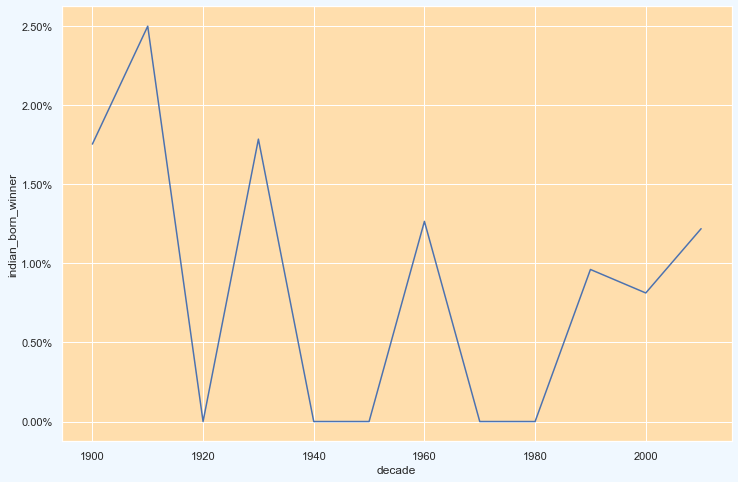

In [6]:
# Setting the plotting theme
sns.set(rc={'axes.facecolor':'navajowhite', 'figure.facecolor':'aliceblue'})
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

# Plotting Indian born winners 
ax = sns.lineplot(x='decade', y='indian_born_winner', data=prop_indian_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# 7. Where do Female Laureates dominate?
<p>We can see from the chart that Female Laureates have been dominating in Literature and Peace Awards. Medicine also has a positive trend.</p>

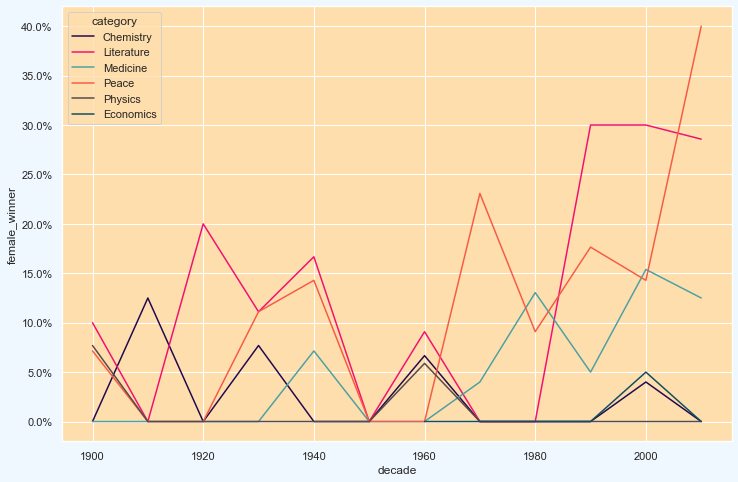

In [7]:
# Calculating the proportion of female laureates per decade
colors = ["#21094e", "#f21170", "#4ca1a3","#f55c47","#564a4a","#114e60"]
sns.set_palette(sns.color_palette(colors))
nobel['female_winner'] = nobel['sex'] == "Female"
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Plotting Indian born winners with % winners on the y-axis
ax = sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# 8. First woman to win a Nobel Prize?
<p>Marie Curie got the Nobel Prize in Physics in 1903 for study in spontaneous radiation.</p>

In [8]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel['sex'] == 'Female'].nsmallest(1, 'year') 


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,indian_born_winner,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,False,True


# 9. Who received 2 or more prizes ?
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? </p>

In [9]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby('full_name').filter(lambda x: len(x) >= 2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,indian_born_winner,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,False,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,False,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False,False


# 10. How old are you when you get the prize?
<p>Many laureates got more than 1 prize, but how old are you generally when you get the prize?</p>

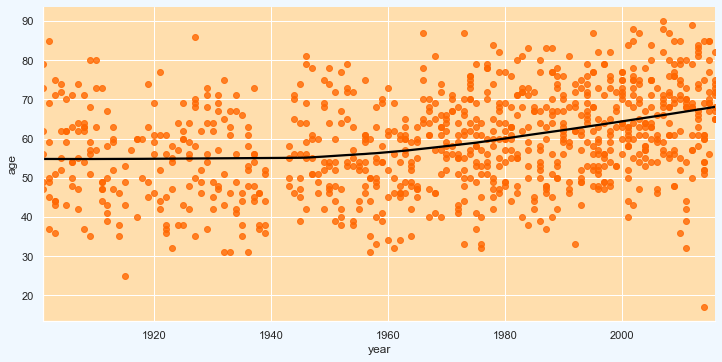

In [10]:
color = ["#ff6701"]
sns.set_palette(sns.color_palette(color))
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=nobel, lowess=True, aspect=2, line_kws={'color': 'black'})

# 11. Age differences between prize categories
<p>We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.</p>
<p>Let's look at age trends within different prize categories.</p>

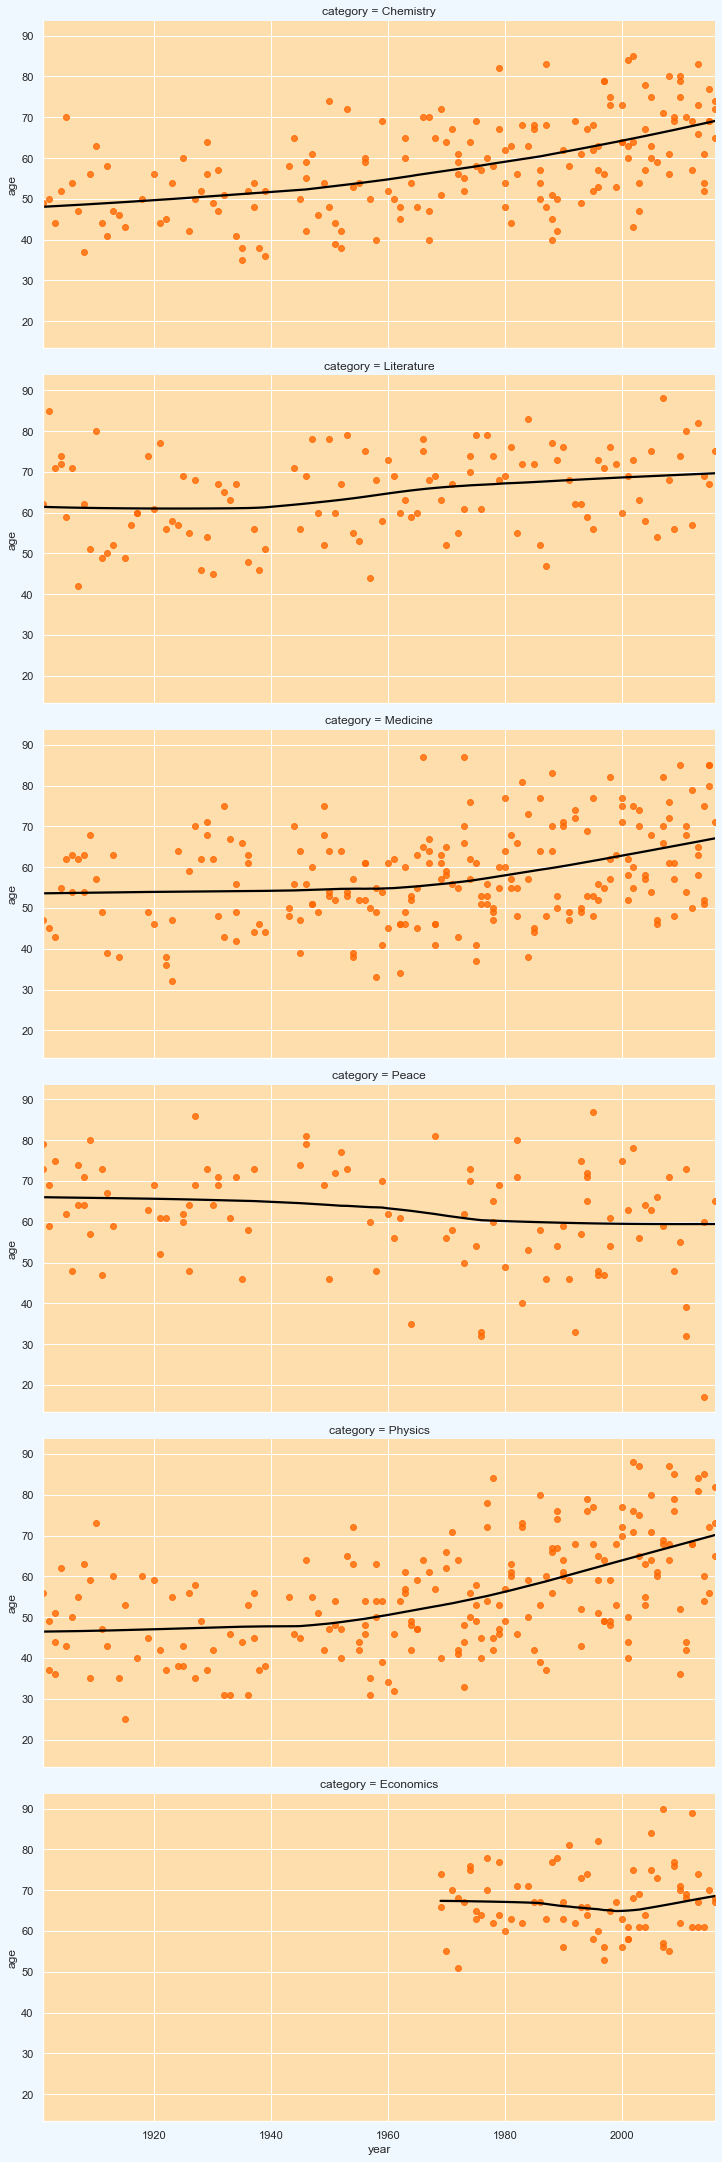

In [11]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='year', y='age', row='category', data=nobel, lowess=True, aspect=2, line_kws={'color': 'black'});

# 12. Oldest and youngest winners
<p>The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger! </p>
<p> Let's see who are the oldest and youngest winners.</p>

In [12]:
# The oldest winner of a Nobel Prize.
display(nobel.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize.
display(nobel.nsmallest(1, 'age'))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,indian_born_winner,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,indian_born_winner,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,False,2010,False,True,17.0


# 13. Country with most prizes in each category

In [13]:
# Which country has won the most prizes in each category?
ChemistryDF = nobel[(nobel.category == 'Chemistry')]
EconomicsDF = nobel[(nobel.category == 'Economics')]
LiteratureDF = nobel[(nobel.category == 'Literature')]
MedicineDF = nobel[(nobel.category == 'Medicine')]
PeaceDF = nobel[(nobel.category == 'Peace')]
PhysicsDF = nobel[(nobel.category == 'Physics')]

In [14]:
print(EconomicsDF['birth_country'].value_counts())

United States of America                 43
United Kingdom                            7
Canada                                    3
France                                    3
Norway                                    3
Netherlands                               2
Sweden                                    2
Russia                                    2
Germany (Poland)                          1
Cyprus                                    1
India                                     1
British West Indies (Saint Lucia)         1
Germany                                   1
British Mandate of Palestine (Israel)     1
Russian Empire (Russia)                   1
Italy                                     1
Russian Empire (Belarus)                  1
Scotland                                  1
Austria                                   1
Hungary                                   1
Finland                                   1
Name: birth_country, dtype: int64


# 14. Which country has most prizes in Economics, visualized

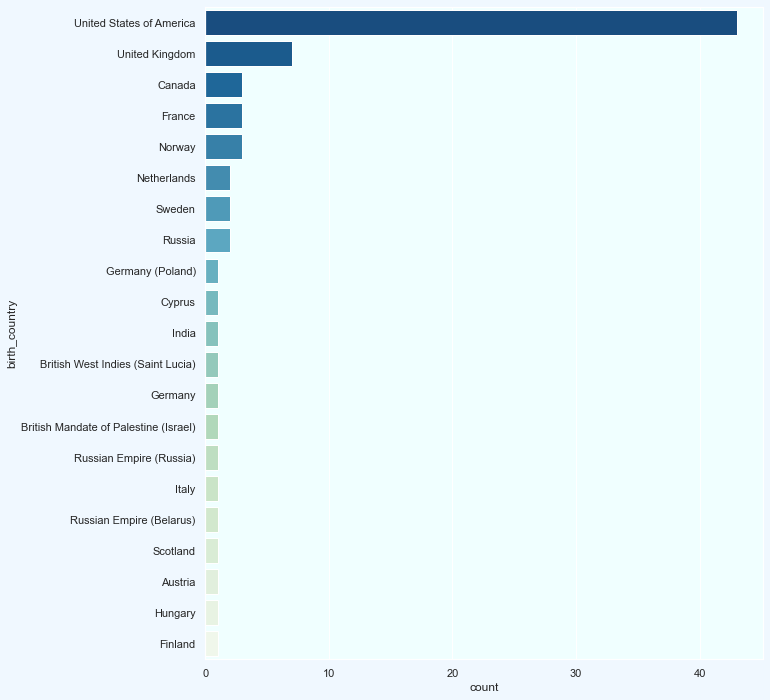

In [15]:
import warnings
warnings.filterwarnings('ignore')

import seaborn.apionly as sns

sns.set(rc={'figure.figsize':(10,12),'axes.facecolor':'azure', 'figure.facecolor':'aliceblue'})

EconomicsGraph = sns.countplot(y="birth_country", data=EconomicsDF,
                order=EconomicsDF['birth_country'].value_counts().index,
                palette='GnBu_r')

# 15. Which Organization has largest number of Nobel Laureates?

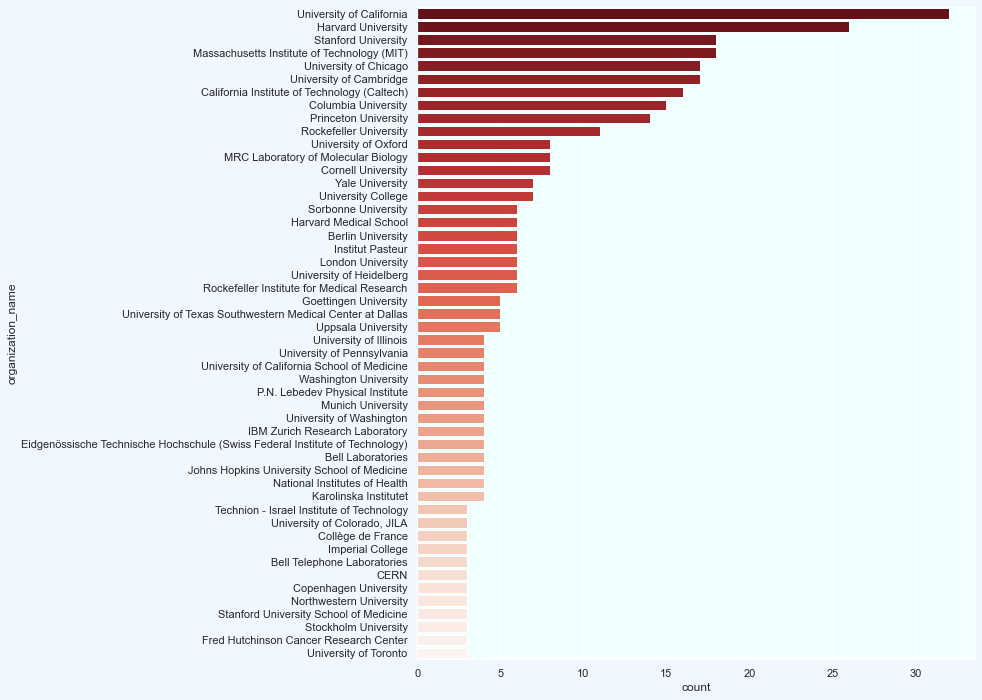

In [16]:
# Organizations with the largest number of Nobel Laureates
c = nobel['organization_name'].value_counts()

sns.set(rc={'figure.figsize':(10,12),'axes.facecolor':'azure', 'figure.facecolor':'aliceblue'})

UniversitiesGraph = sns.countplot(y="organization_name", data=nobel,
              order=c.nlargest(50).index,
              palette='Reds_r')

# 16. Age and Gender Analysis

Male      99
Female    14
Name: sex, dtype: int64


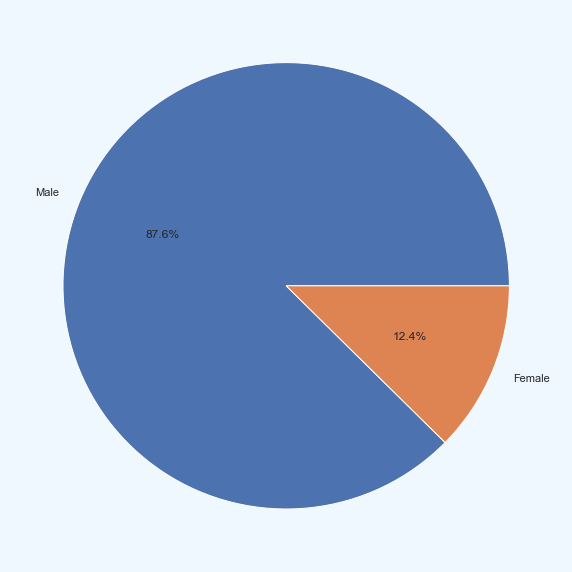

In [17]:
# Age and Gender Analysis
from matplotlib.pyplot import pie, axis, show

LiteratureGender = LiteratureDF['sex'].value_counts()
print(LiteratureGender)

pie(LiteratureGender, labels=LiteratureGender.index, autopct='%1.1f%%');
show()

# 17. Which age category receives the most prizes ?

In [18]:
import warnings
warnings.filterwarnings('ignore')

LiteratureDF['birth_date'] = LiteratureDF['birth_date'].astype(str).str[0:4]
LiteratureDF['birth_date'] = LiteratureDF['birth_date'].replace(to_replace="NaN", value=0)
LiteratureDF['birth_date'] = LiteratureDF['birth_date'].apply(pd.to_numeric)
LiteratureDF["age"] = LiteratureDF["year"] - LiteratureDF["birth_date"]

60s      37
70s      33
50s      28
40s       9
80s       6
Teens     0
20s       0
30s       0
90s       0
Name: Age Categorical, dtype: int64


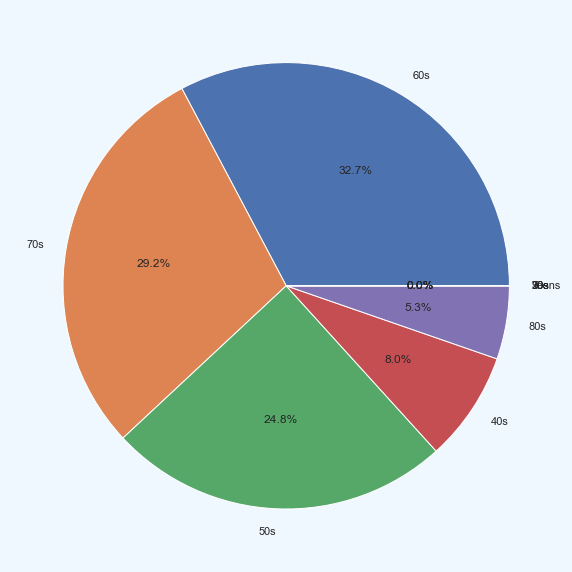

In [19]:
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groupNames = ['Teens', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
LiteratureDF['Age Categorical'] = pd.cut(LiteratureDF['age'], bins, labels=groupNames)
LiteratureAge = LiteratureDF['Age Categorical'].value_counts()
print(LiteratureAge)

pie(LiteratureAge, labels=LiteratureAge.index, autopct='%1.1f%%');
show()